In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/2021/Finger-Print Classification')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
def data_info(direct):
  files = [file.strip() for file in os.listdir('./data/'+direct)]
  filenames = []
  for file in files:
    add = [file[:-4],file[0]]
    filenames.append(add)
  return filenames

In [ ]:
df_train = data_info(direct = 'train')
df_test = data_info(direct = 'test')

train = pd.DataFrame(df_train, columns =['filename', 'label'])
test = pd.DataFrame(df_test, columns = ['filename', 'label'])
display(train.head(), test.head())

filename label
0    1 (1)     1
1   1 (10)     1
2    1 (2)     1
3    1 (3)     1
4    1 (4)     1

filename label
0        1     1
1       10     1
2       11     1
3       12     1
4       13     1

In [ ]:
print('train:', len(train))
print('test:', len(test))

train: 80
test: 80


In [ ]:
def pixel_info(direct, df):
  pixels = []
  for file in list(df['filename']):
    from PIL import Image
    im = Image.open('./data/'+direct+'/'+file+'.bmp')
    pix = list(im.getdata())
    pixels.append(pix)

  df_pix = pd.DataFrame(pixels, columns = list(range(144**2)))
  return df_pix

In [ ]:
train_pix = pixel_info('train', train)
test_pix = pixel_info('test', test)

In [ ]:
display(train_pix.head(), test_pix.head())

0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   20726  20727  20728  20729  20730  20731  20732  20733  20734  20735  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 20736 columns]

0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   20726  20727  20728  20729  20730  20731  20732  20733  20734  20735  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 20736 columns]

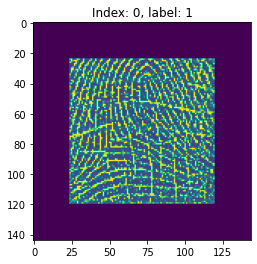

In [ ]:
idx = 0
img = train_pix.loc[idx, '0':].values.reshape(144, 144).astype(int)
label = train.loc[idx, 'label']

plt.title('Index: %i, label: %s'%(idx, label))
plt.imshow(img)
plt.show()

Train-Test-Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_pix.values, train['label'], test_size = 0.3, random_state=42, shuffle=True, stratify=None)

Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv = 3, scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


Save Model

In [ ]:
with open('./model/model_rf.pkl','wb') as f:
    pickle.dump(rf,f)

Load Model

In [ ]:
with open('model/model_rf.pkl', 'rb') as f:
    best = pickle.load(f)

In [ ]:
val_pred = best.predict(X_val)
acc = (val_pred == y_val).mean()
print("Accuracy: %0.2f" % (acc))

Accuracy: 1.00


In [ ]:
print(classification_report(y_val ,val_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
# Test dataset prediction
test_pred = best.predict(test_pix.values)

In [ ]:
test['label'] = test_pred
test['filename'] = pd.to_numeric(test["filename"])
test

filename label
0          1     7
1         10     3
2         11     3
3         12     2
4         13     5
..       ...   ...
75        78     1
76        79     7
77         8     3
78        80     6
79         9     5

[80 rows x 2 columns]

In [ ]:
result = test.sort_values(by=['filename'], ascending=True)
result.head()

filename label
0          1     7
11         2     3
22         3     2
33         4     6
44         5     1

In [ ]:
result.to_csv('./result/result_rf.csv', index = False)

In [ ]:
result = pd.read_csv('./result/result_rf.csv')
result.head()

filename  label
0         1      7
1         2      3
2         3      2
3         4      6
4         5      1

In [ ]:
from collections import Counter
Counter(result['label'])

Counter({7: 5, 3: 24, 2: 10, 6: 15, 1: 3, 5: 10, 8: 10, 4: 3})